# Plot PC loadings contributions

Script related to figure s3e

### Aim:
- Plot ConsensusTME NES PCA loadings contributions

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from pandas.api.types import CategoricalDtype

In [3]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Get sample labels

### Load file


In [4]:
file_keys = home + 'Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity.txt'

sample_labels = pd.read_csv(file_keys, sep='\t', index_col='Well')

In [5]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES
Well,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706


## Load ssGSEA results

In [6]:
file_nes = home + 'Data/3/ConsensusTME_TreatmentNaive_NES.txt'

data_nes = pd.read_csv(file_nes, sep='\t')

data_nes.set_index('Term', inplace=True)

In [7]:
data_nes.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
Term,,,,,,,,,,,,,,,,,,,,,
B_cells,0.038479,0.154999,0.131586,0.088623,0.038772,-0.017512,-0.047078,-0.086647,-0.199374,-0.054448,...,0.012504,0.114890,-0.036248,0.016278,-0.012882,0.144749,0.120451,0.104527,0.083152,-0.065881
Cytotoxic_cells,0.210148,0.187567,0.153687,-0.144163,0.003858,-0.155173,-0.290251,-0.170454,-0.416859,-0.319623,...,-0.345901,-0.250878,-0.304831,-0.221868,-0.305614,-0.003971,-0.002669,-0.075072,-0.086188,-0.243335
Dendritic_cells,0.189096,0.226787,0.275280,0.044318,0.094001,0.092652,-0.010609,0.014540,-0.053804,-0.020696,...,0.024979,0.133931,0.030942,0.075847,0.023800,0.168763,0.151665,0.143299,0.211832,0.002961
Endothelial,0.157806,0.163239,0.208535,0.016865,0.032350,0.052494,-0.086343,0.001588,-0.045086,-0.030739,...,0.037816,0.161829,0.084950,0.095482,-0.077438,0.132625,0.166421,0.091700,0.119399,-0.119859
Eosinophils,0.200823,0.197690,0.271950,-0.022362,0.083034,0.079010,-0.055555,-0.011277,-0.048784,-0.128144,...,0.029711,0.080649,-0.048187,0.134062,0.032138,0.166387,0.158940,0.207949,0.205483,-0.054183


### Check empty cells

In [8]:
set(data_nes.isnull().sum())

{0}

## Load mRNA tumour cellularity data

In [9]:
mRNA_tumcell_file = home + 'Data/1/TreatmentNaive_log2exp_loess_norm_filtered_ESTIMATE.txt'

mRNA_tumcell = pd.read_csv(mRNA_tumcell_file,
                           skiprows=2,
                           sep='\t',
                           index_col='NAME')

del(mRNA_tumcell['Description'])

In [10]:
mRNA_tumcell.head().head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
NAME,,,,,,,,,,,,,,,,,,,,,
StromalScore,213.898183,441.185072,627.161634,-257.879171,-105.932457,-179.742309,-667.871861,-554.187271,-467.547274,-424.048973,...,276.215651,819.700176,542.094611,446.049523,100.214812,640.683420,1028.302292,631.494907,843.594952,-393.705822
ImmuneScore,789.397143,1103.963967,996.569838,119.238243,354.124225,197.378769,-395.243536,-16.422432,-469.452988,-563.011739,...,-18.442529,526.734281,-25.089182,238.412959,-60.730519,890.081437,776.296638,680.327079,892.726571,-226.504212
ESTIMATEScore,1003.295326,1545.149039,1623.731472,-138.640928,248.191767,17.636459,-1063.115397,-570.609703,-937.000262,-987.060713,...,257.773122,1346.434456,517.005428,684.462482,39.484294,1530.764858,1804.598930,1311.821985,1736.321523,-620.210034
TumorPurity,0.730147,0.673548,0.664978,0.833913,0.801248,0.821034,0.900910,0.867208,0.892722,0.896009,...,0.800405,0.694819,0.777021,0.761314,0.819199,0.675108,0.644917,0.698464,0.652544,0.870811


### Add mRNA purity to NES dataframe

In [11]:
data_nes_t = data_nes.T

#### Multiply purity times a small number to reduce it's impact in the PCA

In [12]:
data_nes_t['TumourCellularity_mRNA'] = mRNA_tumcell.loc['TumorPurity'] * 0.0001

In [13]:
data_nes = data_nes_t.T 

In [14]:
data_nes.tail()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
Term,,,,,,,,,,,,,,,,,,,,,
T_cells_CD4,-0.042384,0.050694,0.004308,-0.207399,-0.165377,-0.208819,-0.255628,-0.257014,-0.333821,-0.314090,...,-0.263731,-0.148920,-0.276321,-0.170624,-0.266695,0.002644,-0.044748,-0.136003,-0.058358,-0.254172
T_cells_CD8,-0.017664,0.060364,-0.000962,-0.153047,-0.133178,-0.183371,-0.250569,-0.248262,-0.325777,-0.280394,...,-0.250714,-0.179655,-0.287451,-0.188185,-0.219502,0.002935,-0.005583,-0.084019,-0.045147,-0.269410
T_cells_gamma_delta,-0.038414,0.052337,-0.005596,-0.151517,-0.140392,-0.208642,-0.297564,-0.266138,-0.367513,-0.289465,...,-0.346152,-0.189331,-0.311887,-0.237372,-0.251334,-0.058035,-0.047690,-0.156334,-0.051404,-0.335890
T_regulatory_cells,-0.108068,0.054963,-0.088210,-0.117862,-0.184319,-0.183183,-0.213260,-0.254521,-0.324164,-0.332699,...,-0.290274,-0.119889,-0.306815,-0.224312,-0.232095,0.037718,-0.043270,-0.188168,-0.111135,-0.293895
TumourCellularity_mRNA,0.000073,0.000067,0.000066,0.000083,0.000080,0.000082,0.000090,0.000087,0.000089,0.000090,...,0.000080,0.000069,0.000078,0.000076,0.000082,0.000068,0.000064,0.000070,0.000065,0.000087


### Visulase NES

#### Samples

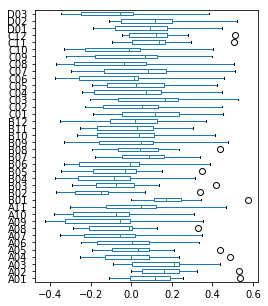

In [15]:
data_nes.plot(kind='box',
              vert=False,
              figsize=(4,5))

#### Variables

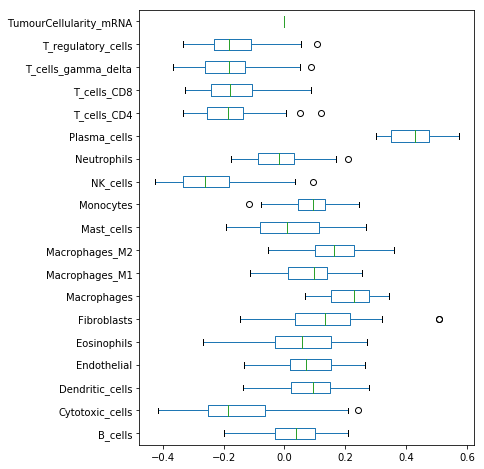

In [16]:
data_nes.transpose().plot(kind='box',
                          vert=False,
                          figsize=(6,8))

## Calculate PCA

In [17]:
pca = PCA(n_components=7)

In [18]:
pca_nes = pca.fit_transform(data_nes.transpose())

In [19]:
len(pca_nes) # check number of data points

38

In [20]:
var_exp = sorted(pca.explained_variance_ratio_, reverse=True)

## Plot features PCs contributions

### Define gene set colors

In [21]:
GREEN = '#007F00'
RED = '#CC0000'
GREY = '#D3D3D3'
BLUE = '#0000E5'
YELLOW = '#FFFF00'

color_sets = {
'Endothelial':                                  RED,
'B_cells':                                      '#A6CDE1',
'T_cells_CD8':                                  '#FFDD15',
'Cytotoxic_cells':                              '#FFD400',
'Dendritic_cells':                              '#A181BA',
'Eosinophils':                                  '#D8AF62',
'Macrophages':                                  '#F58A21',
'Macrophages_M1':                               '#F58A21',
'Macrophages_M2':                               '#F58A21',
'Monocytes':                                    '#F58A21',
'Mast_cells':                                   '#F7F29B',
'NK_cells':                                     '#70B09D',
'Neutrophils':                                  '#B05A28',
'T_cells_gamma_delta':                          '#4F9F45',
'T_cells_CD4':                                  '#EC1C24',
'T_regulatory_cells':                           '#67B853',
'Plasma_cells':                                 '#A6CDE1',
'Fibroblasts':                                  BLUE,
'TumourCellularity_mRNA':                       'k'
}

### Dump components relations with features

In [22]:
components = pd.DataFrame(pca.components_,
                          columns=data_nes.transpose().columns)

In [23]:
components.head()

Term,B_cells,Cytotoxic_cells,Dendritic_cells,Endothelial,Eosinophils,Fibroblasts,Macrophages,Macrophages_M1,Macrophages_M2,Mast_cells,Monocytes,NK_cells,Neutrophils,Plasma_cells,T_cells_CD4,T_cells_CD8,T_cells_gamma_delta,T_regulatory_cells,TumourCellularity_mRNA
0,0.199150,0.374596,0.234902,0.198715,0.263675,0.141912,0.177803,0.207990,0.218919,0.282017,0.172355,0.308406,0.197418,0.146550,0.254165,0.249592,0.257266,0.234523,-0.000020
1,0.041266,-0.308257,0.067577,0.222691,0.193657,0.798446,0.059584,0.041747,0.126812,0.020769,0.124480,-0.205568,0.072212,0.001397,-0.094850,-0.127569,-0.214289,-0.134657,-0.000017
2,0.222551,-0.567940,0.045473,-0.012673,0.064971,-0.400171,0.180189,0.202322,0.134303,0.398641,0.250259,-0.283330,0.001942,0.082304,-0.052547,-0.078185,-0.018895,0.228168,0.000005
3,-0.305206,-0.035913,0.098624,0.237099,0.545115,-0.303673,-0.032908,-0.127789,-0.080851,-0.101501,0.037196,-0.039918,0.532245,-0.311864,0.006430,-0.055948,-0.110205,-0.130992,0.000004
4,0.015115,0.237532,0.088346,0.138285,-0.194607,-0.088479,0.065129,0.144850,0.152960,0.527915,-0.081762,0.069213,-0.046308,-0.265699,-0.310978,-0.157466,-0.019632,-0.580778,0.000002


### PCs barplots

In [24]:
feature_names = pd.Series(components.columns.values,name='features')

In [25]:
PCs = pca.components_

pc_df = pd.DataFrame(PCs).T
pc_df = pd.concat([feature_names,pc_df],axis=1)

pc_df.set_index('features',inplace=True)

In [26]:
fcolors = []
for f in pc_df.index:
    fcolors.append(color_sets[f])

In [27]:
fcolors_df = pd.DataFrame({'index':pc_df.index,
                           'color':pd.Series(fcolors)})

fcolors_df.set_index('index',inplace=True)

In [28]:
pc_df = pd.concat([pc_df,fcolors_df],axis=1)

In [29]:
pc_df.tail()

,0,1,2,3,4,5,6,color
T_cells_CD4,0.254165,-0.094850,-0.052547,0.006430,-0.310978,4.169036e-03,-0.302632,#EC1C24
T_cells_CD8,0.249592,-0.127569,-0.078185,-0.055948,-0.157466,2.374609e-02,-0.114979,#FFDD15
T_cells_gamma_delta,0.257266,-0.214289,-0.018895,-0.110205,-0.019632,1.301913e-01,-0.110555,#4F9F45
T_regulatory_cells,0.234523,-0.134657,0.228168,-0.130992,-0.580778,1.812984e-01,-0.211681,#67B853
TumourCellularity_mRNA,-0.000020,-0.000017,0.000005,0.000004,0.000002,-2.347320e-07,0.000006,k


### Remove TumourCellularity_mRNA feature to sort the other features

In [30]:
TumCell = pc_df.loc['TumourCellularity_mRNA']
TumCell

0       -1.95208e-05
1       -1.68806e-05
2        5.10086e-06
3        4.29665e-06
4        1.54923e-06
5       -2.34732e-07
6        6.16974e-06
color              k
Name: TumourCellularity_mRNA, dtype: object

In [31]:
pc_df.drop('TumourCellularity_mRNA',
           axis=0,
           inplace=True)

### Sort features within PCs

In [32]:
pc_df0 = pc_df.sort_values(by=[0],
                           inplace=False)  

pc_df0['feature'] = pc_df0.index

pc_df1 = pc_df.sort_values(by=[1],
                           inplace=False)

pc_df1['feature'] = pc_df1.index

pc_df2 = pc_df.sort_values(by=[2],
                           inplace=False)

pc_df2['feature'] = pc_df2.index

pc_df3 = pc_df.sort_values(by=[3],
                           inplace=False)  

pc_df3['feature'] = pc_df3.index

pc_df4 = pc_df.sort_values(by=[4],
                           inplace=False)  

pc_df4['feature'] = pc_df4.index

pc_df5 = pc_df.sort_values(by=[5],
                           inplace=False)  

pc_df5['feature'] = pc_df5.index

pc_df6 = pc_df.sort_values(by=[6],
                           inplace=False) 

pc_df6['feature'] = pc_df6.index

### Plot

[]

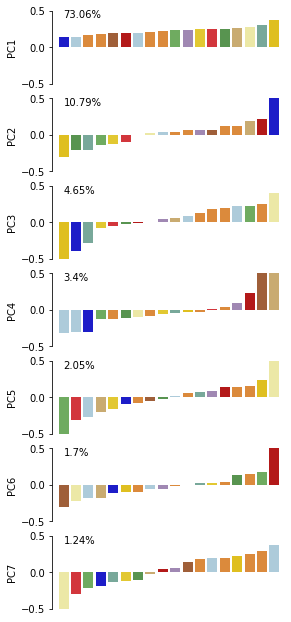

In [33]:
y_anotate=0.4

fig,(ax0,ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=7,
                                                 ncols=1,
                                                 figsize=(4, 11),
                                                 sharex=True,
                                                 sharey=True)                                               

sns.barplot(x='feature',
            y=0,
            data=pc_df0,
            palette=pc_df0.color,
            ax=ax0)

ax0.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[0]*100,2))+'%')
ax0.set_ylabel("PC1")
ax0.set_xlabel('')
ax0.set_ylim([-0.5,0.5])
sns.despine(bottom=True,trim=True,offset=5)


sns.barplot(x='feature',
            y=1,
            data=pc_df1,
            palette=pc_df1.color,
            ax=ax1)

ax1.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[1]*100,2))+'%')
ax1.set_ylabel("PC2")
ax1.set_xlabel('')


sns.barplot(x='feature',
            y=2,
            data=pc_df2,
            palette=pc_df2.color,
            ax=ax2)

ax2.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[2]*100,2))+'%')
ax2.set_ylabel("PC3")
ax2.set_xlabel('')


sns.barplot(x='feature',
            y=3,
            data=pc_df3,
            palette=pc_df3.color,
            ax=ax3)

ax3.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[3]*100,2))+'%')
ax3.set_ylabel("PC4")
ax3.set_xlabel('')


sns.barplot(x='feature',
            y=4,
            data=pc_df4,
            palette=pc_df4.color,
            ax=ax4)

ax4.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[4]*100,2))+'%')
ax4.set_ylabel("PC5")
ax4.set_xlabel('')


sns.barplot(x='feature',
            y=5,
            data=pc_df5,
            palette=pc_df5.color,
            ax=ax5)

ax5.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[5]*100,2))+'%')
ax5.set_ylabel("PC6")
ax5.set_xlabel('')

sns.barplot(x='feature',
            y=6,
            data=pc_df6,
            palette=pc_df6.color,
            ax=ax6)

ax6.text(x=0,y=y_anotate,
         s=str(round(var_exp[6]*100,2))+'%')
ax6.set_ylabel("PC7")
ax6.set_xlabel('')

# Finalize the plot
sns.despine(bottom=True,trim=True,offset=5)
plt.setp(fig.axes,xticks=[])

### Save plot

In [34]:
FILE = '../../Figures/supplementary/3/panels/s3e_TreatmentNaive_ConsensusTME_PCs_loadings.pdf'

fig.savefig(FILE, bbox='tight')

# End script